In [2]:
%pip install sklearn
%pip install scikit-learn
%pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import json

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 815.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 16.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.0 MB 33.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 36.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 23.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/11.0 MB 26.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.7/11.0 MB 28.9 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 32.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   -----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\maiti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\maiti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Get all the real tags and the predictions

In [3]:
ruta_archivo = "output/predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))


In [4]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.8025166923472008

In [5]:
cm=confusion_matrix(all_tags, all_predictions)
cm

array([[ 572,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  572,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,  126,    0,    5,    0,    0,    0,    0,   56,   26,
           0,    0,    6,    0,    8],
       [   0,    0,    0, 1315,    2,    0,    0,    0,    0,   54,   20,
           1,    0,    7,    0,   16],
       [   0,    0,    4,    0,   18,    0,    0,    0,    0,    6,   13,
           0,    0,    7,    0,   11],
       [   0,    0,    0,    0,    0,  214,    0,    0,    0,   19,   16,
           0,    0,    2,    0,   15],
       [   0,    0,    0,    0,    0,    0,  101,    0,    0,    2,    2,
           0,    0,    0,    0,    2],
       [   0,    0,    0,   15,    1,    0,    0,  427,    0,   41,   18,
           0,   64,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,   32,    1,    1,
           0,    0,   

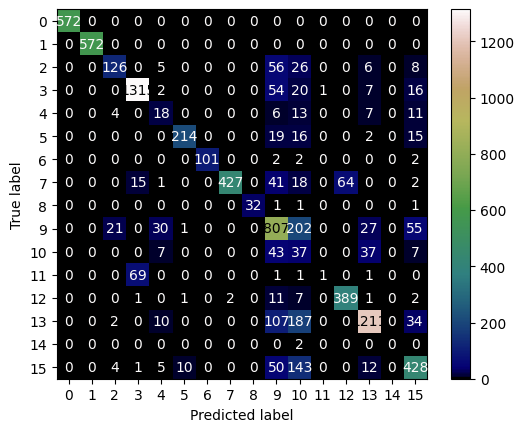

In [6]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="gist_earth")
plt.show()